In [1]:
import matplotlib.pyplot as plt
import numpy as np

from allenact_plugins.stretch_manipulathor_plugin.strech_task_sampler_exproom import (
    StretchExpRoomPickPlaceResetFreeTaskSampler,
    StretchExpRoomPickPlaceTaskSampler,
)
from allenact_plugins.stretch_manipulathor_plugin.stretch_constants import (
    STRETCH_ENV_ARGS, STRETCH_MANIPULATHOR_FURNISHED_COMMIT_ID,
)

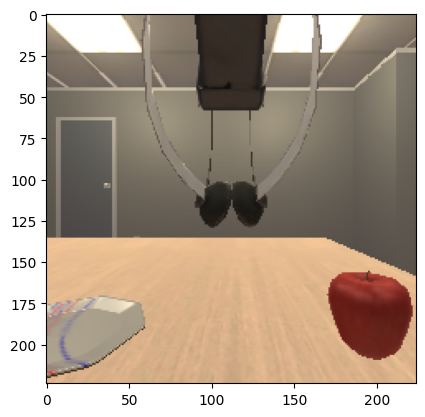

In [2]:
# single combo budget, `StretchExpRoomPickPlaceTaskSampler` for episodic
task_sampler = StretchExpRoomPickPlaceResetFreeTaskSampler(
    object_combos=[("Red_Apple", "Stripe_Plate")],
    # instrument setup may be limited in RF or RM setting, 
    # so using fixed container at the center of the receptacle
    # while Pos-OoD would evaluate with random picking and placing object positions
    fixed_container=True,
    # RM-RL kwagrs
    # random_targets: whether using random targets for RM-RL
    random_targets=True,
    # whether using two-phase FB-RL
    two_phase=False,
    # whether using measurement-led intervention
    irr_measure=True,
    # measurement name if using measurement-led intervention
    irr_measure_method="std",
    # num_steps_for_resets: interval for periodic resets, infinity by default for RF/RM
    num_steps_for_resets=np.inf,
    # oracle intervention if the picking object is falling off the receptacle
    reset_if_obj_dropped=False,
)
task = task_sampler.next_task()
frame = task.render()  # wrist-centric observation
plt.imshow(frame)
plt.show()

[04/03 11:06:33 DEBUG:] use third-person view third_party camera for debug mode	[stretch_task_base.py: 634]


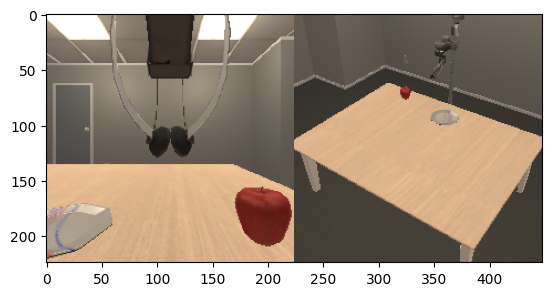

In [3]:
# debug frame including third-person view
debug_frame = task.render(mode="debug")
plt.imshow(debug_frame)
plt.show()

In [4]:
# Action names
task.class_action_names()

('MoveAhead',
 'MoveBack',
 'MoveArmHeightP',
 'MoveArmHeightM',
 'MoveArmZP',
 'MoveArmZM',
 'PickUp',
 'ReleaseObject',
 'MoveWristPSmall',
 'MoveWristMSmall')

[04/03 11:06:34 INFO:] Move Ahead	[system.py: 196]


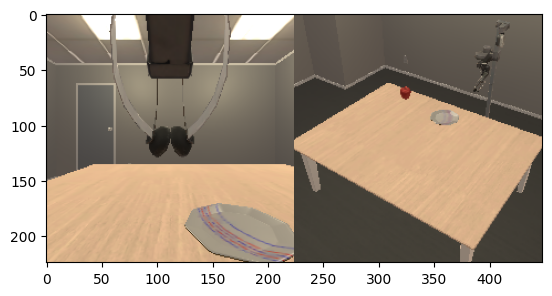

[04/03 11:06:35 INFO:] Lift Arm	[system.py: 196]


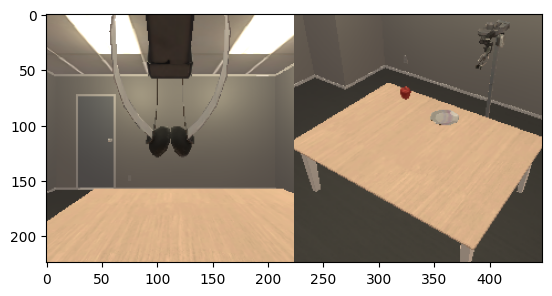

[04/03 11:06:35 INFO:] Extend Arm	[system.py: 196]


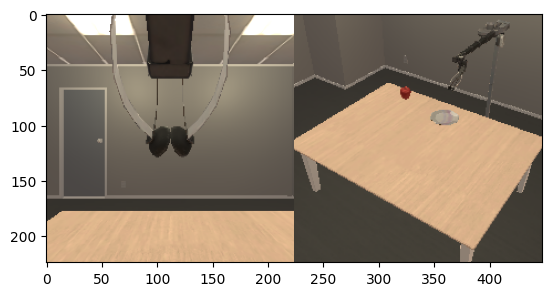

[04/03 11:06:36 INFO:] Rotate Wrist	[system.py: 196]


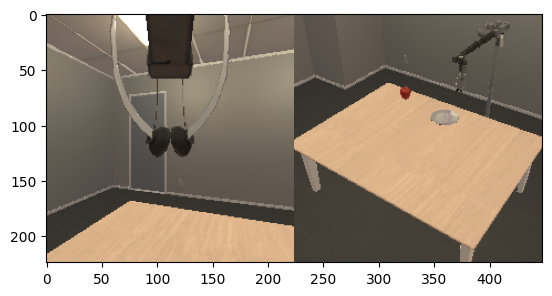

In [5]:
# Move Ahead (left equivalently)
for _ in range(10):
    task.env.step(dict(action="MoveAhead"))
debug_frame = task.render(mode="debug")
print("Move Ahead")
plt.imshow(debug_frame)
plt.show()

# Lift Arm (in y relatively)
for _ in range(10):
    task.env.step(dict(action="MoveArmHeightP"))
debug_frame = task.render(mode="debug")
print("Lift Arm")
plt.imshow(debug_frame)
plt.show()

# Extend Arm
for _ in range(10):
    task.env.step(dict(action="MoveArmZP"))
debug_frame = task.render(mode="debug")
print("Extend Arm")
plt.imshow(debug_frame)
plt.show()

# Rotate Wrist (in yaw)
for _ in range(10):
    task.env.step(dict(action="MoveWristPSmall"))
debug_frame = task.render(mode="debug")
print("Rotate Wrist")
plt.imshow(debug_frame)
plt.show()

In [6]:
# Useful state information at current step
task.current_state_metadata

{'agent_location': {'x': -0.30000001192092896,
  'y': 0.9009922742843628,
  'z': -1.0499999523162842,
  'rotation': 270.0,
  'horizon': 0.0,
  'standing': True},
 'hand_state': {'position': {'x': -0.276147723197937,
   'y': 0.8878997564315796,
   'z': -0.7015930414199829},
  'rotation': {'x': 0, 'y': 0, 'z': 0},
  'radius': 0.05999999865889549},
 'source_obj_state': {'name': 'Red_Apple',
  'position': {'x': -0.05559295415878296,
   'y': 0.7022296190261841,
   'z': -0.5175527930259705},
  'rotation': {'x': -1.8021868527284823e-05,
   'y': 30.00000762939453,
   'z': 3.155478407279588e-05},
  'visible': False,
  'isInteractable': False,
  'receptacle': False,
  'toggleable': False,
  'isToggled': False,
  'breakable': False,
  'isBroken': False,
  'canFillWithLiquid': False,
  'isFilledWithLiquid': False,
  'fillLiquid': None,
  'dirtyable': False,
  'isDirty': False,
  'canBeUsedUp': False,
  'isUsedUp': False,
  'cookable': False,
  'isCooked': False,
  'temperature': 'RoomTemp',
  'isH

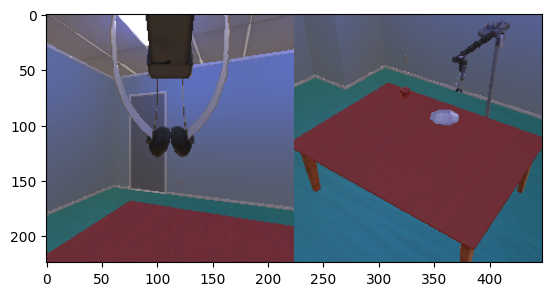

In [7]:
# randomization (could be input kwargs when init env)
task.env.controllable_randomization = True
task.env.randomize_lighting = task.env.randomize_materials = True
task.env.randomize_texture_lightning()
plt.imshow(task.render(mode="debug"))
plt.show()

In [8]:
task.env.stop()   # close ai2-thor controller

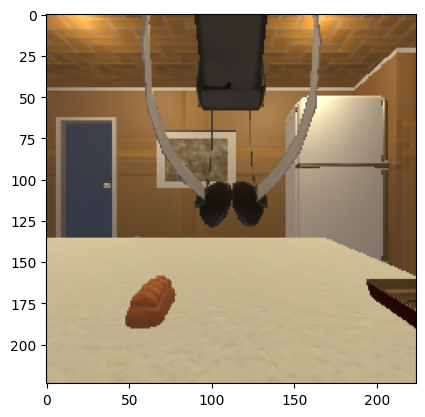

In [9]:
# Furnished exp_room (All-OoD except no randomizing textures for demonstration purpose)
task_sampler = StretchExpRoomPickPlaceTaskSampler(
    object_combos=[("Bread", "Bake_Pan")],
    env_args={
        **STRETCH_ENV_ARGS,
        "commit_id": STRETCH_MANIPULATHOR_FURNISHED_COMMIT_ID,
    },
)
task = task_sampler.next_task()
frame = task.render()
plt.imshow(frame)
plt.show()

[04/03 11:06:46 DEBUG:] use third-person view third_party camera for debug mode	[stretch_task_base.py: 634]


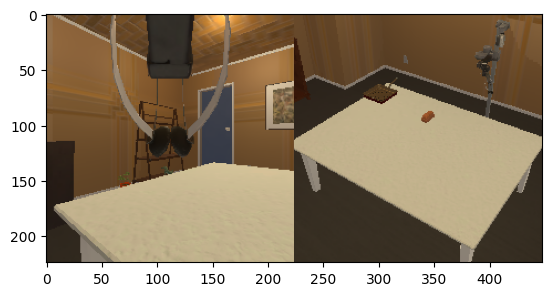

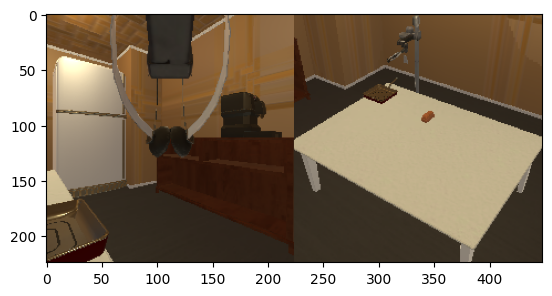

In [10]:
for _ in range(10):
    task.env.step(dict(action="MoveAhead"))
for _ in range(20):
    task.env.step(dict(action="MoveWristPSmall"))
debug_frame = task.render(mode="debug")
plt.imshow(debug_frame)
plt.show()

for _ in range(20):
    task.env.step(dict(action="MoveBack"))
for _ in range(40):
    task.env.step(dict(action="MoveWristMSmall"))
debug_frame = task.render(mode="debug")
plt.imshow(debug_frame)
plt.show()